# LAB01 - GROUP 5 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
%matplotlib inline

## Importing the Data

In [2]:
df=pd.read_csv(r"C:\Users\admin\Downloads\CHUYÊN NGÀNH 4\DAP391m\1_mat1\dataset\lab1_kc_house_data.csv")
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## EDA and Visulization

In [4]:
df['date']=pd.to_datetime(df['date'])
df['year']=df['date'].apply(lambda x: x.year)
df['month']=df['date'].apply(lambda x: x.month)
df.drop(['date'], axis=1,inplace=True)

In [5]:
df['renovated']=df['yr_renovated'].apply(lambda x: 0 if x==0 else 1) 
df.drop(['yr_renovated'], axis=1,inplace=True)

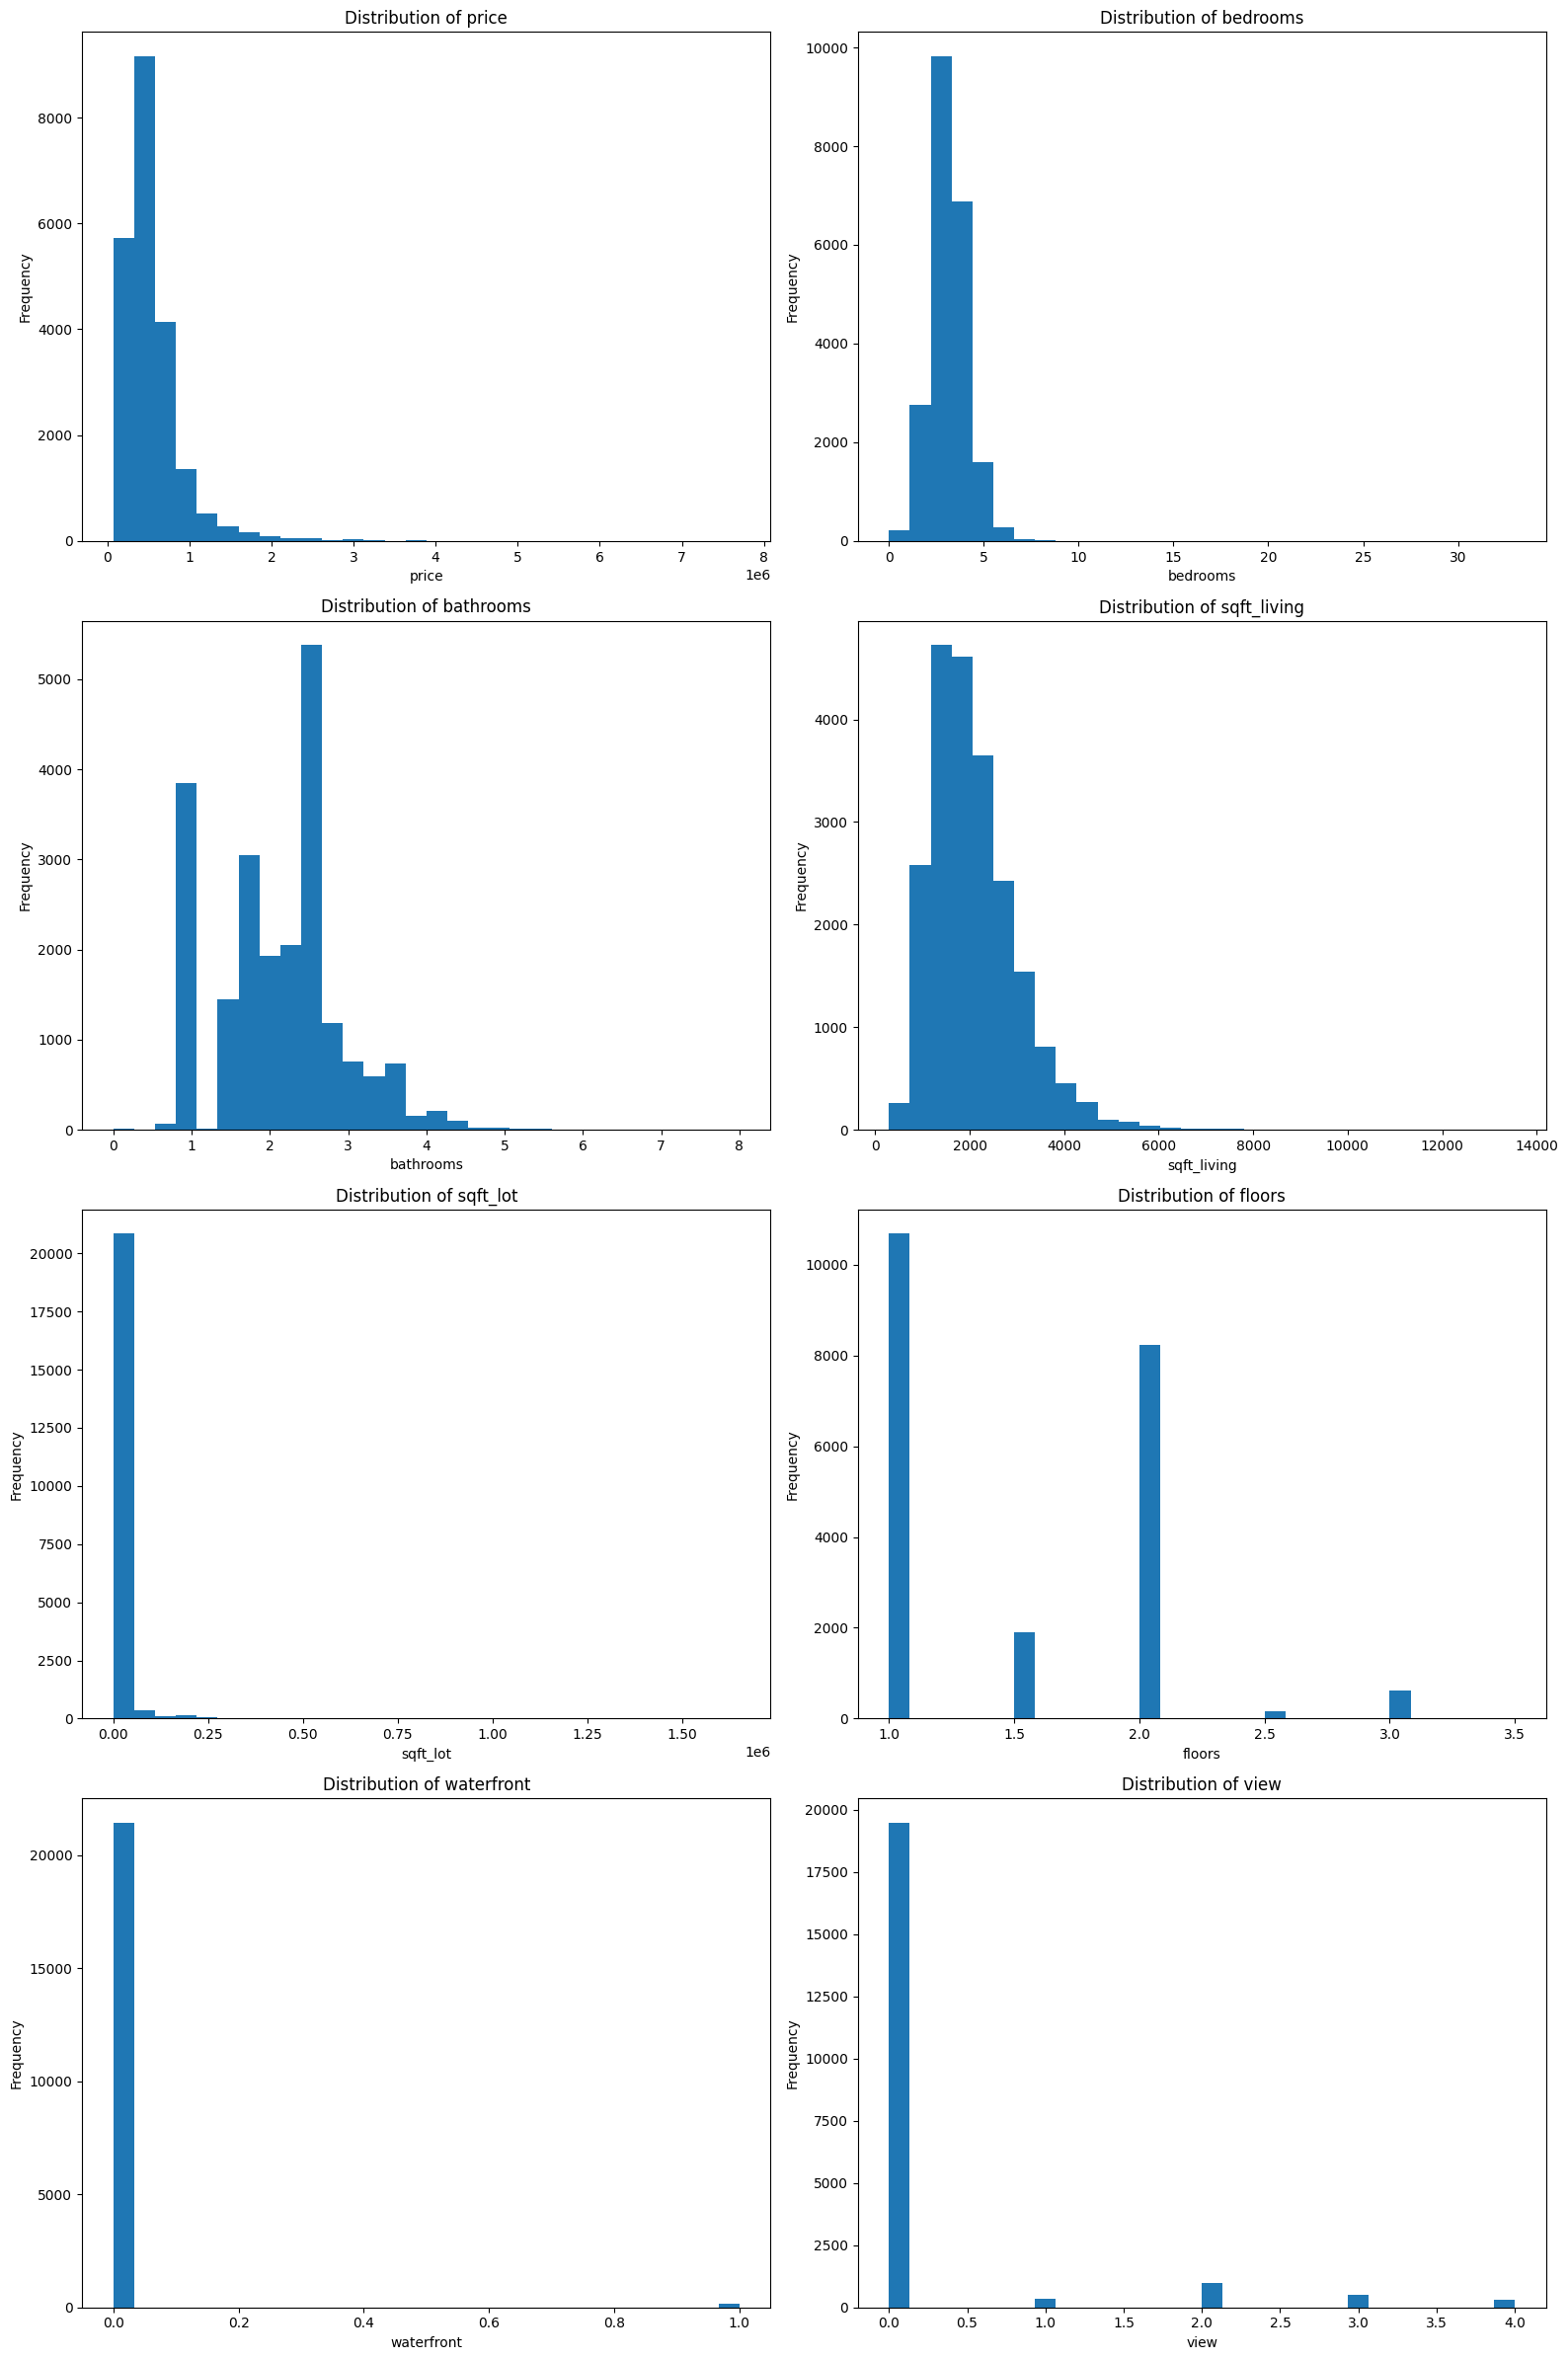

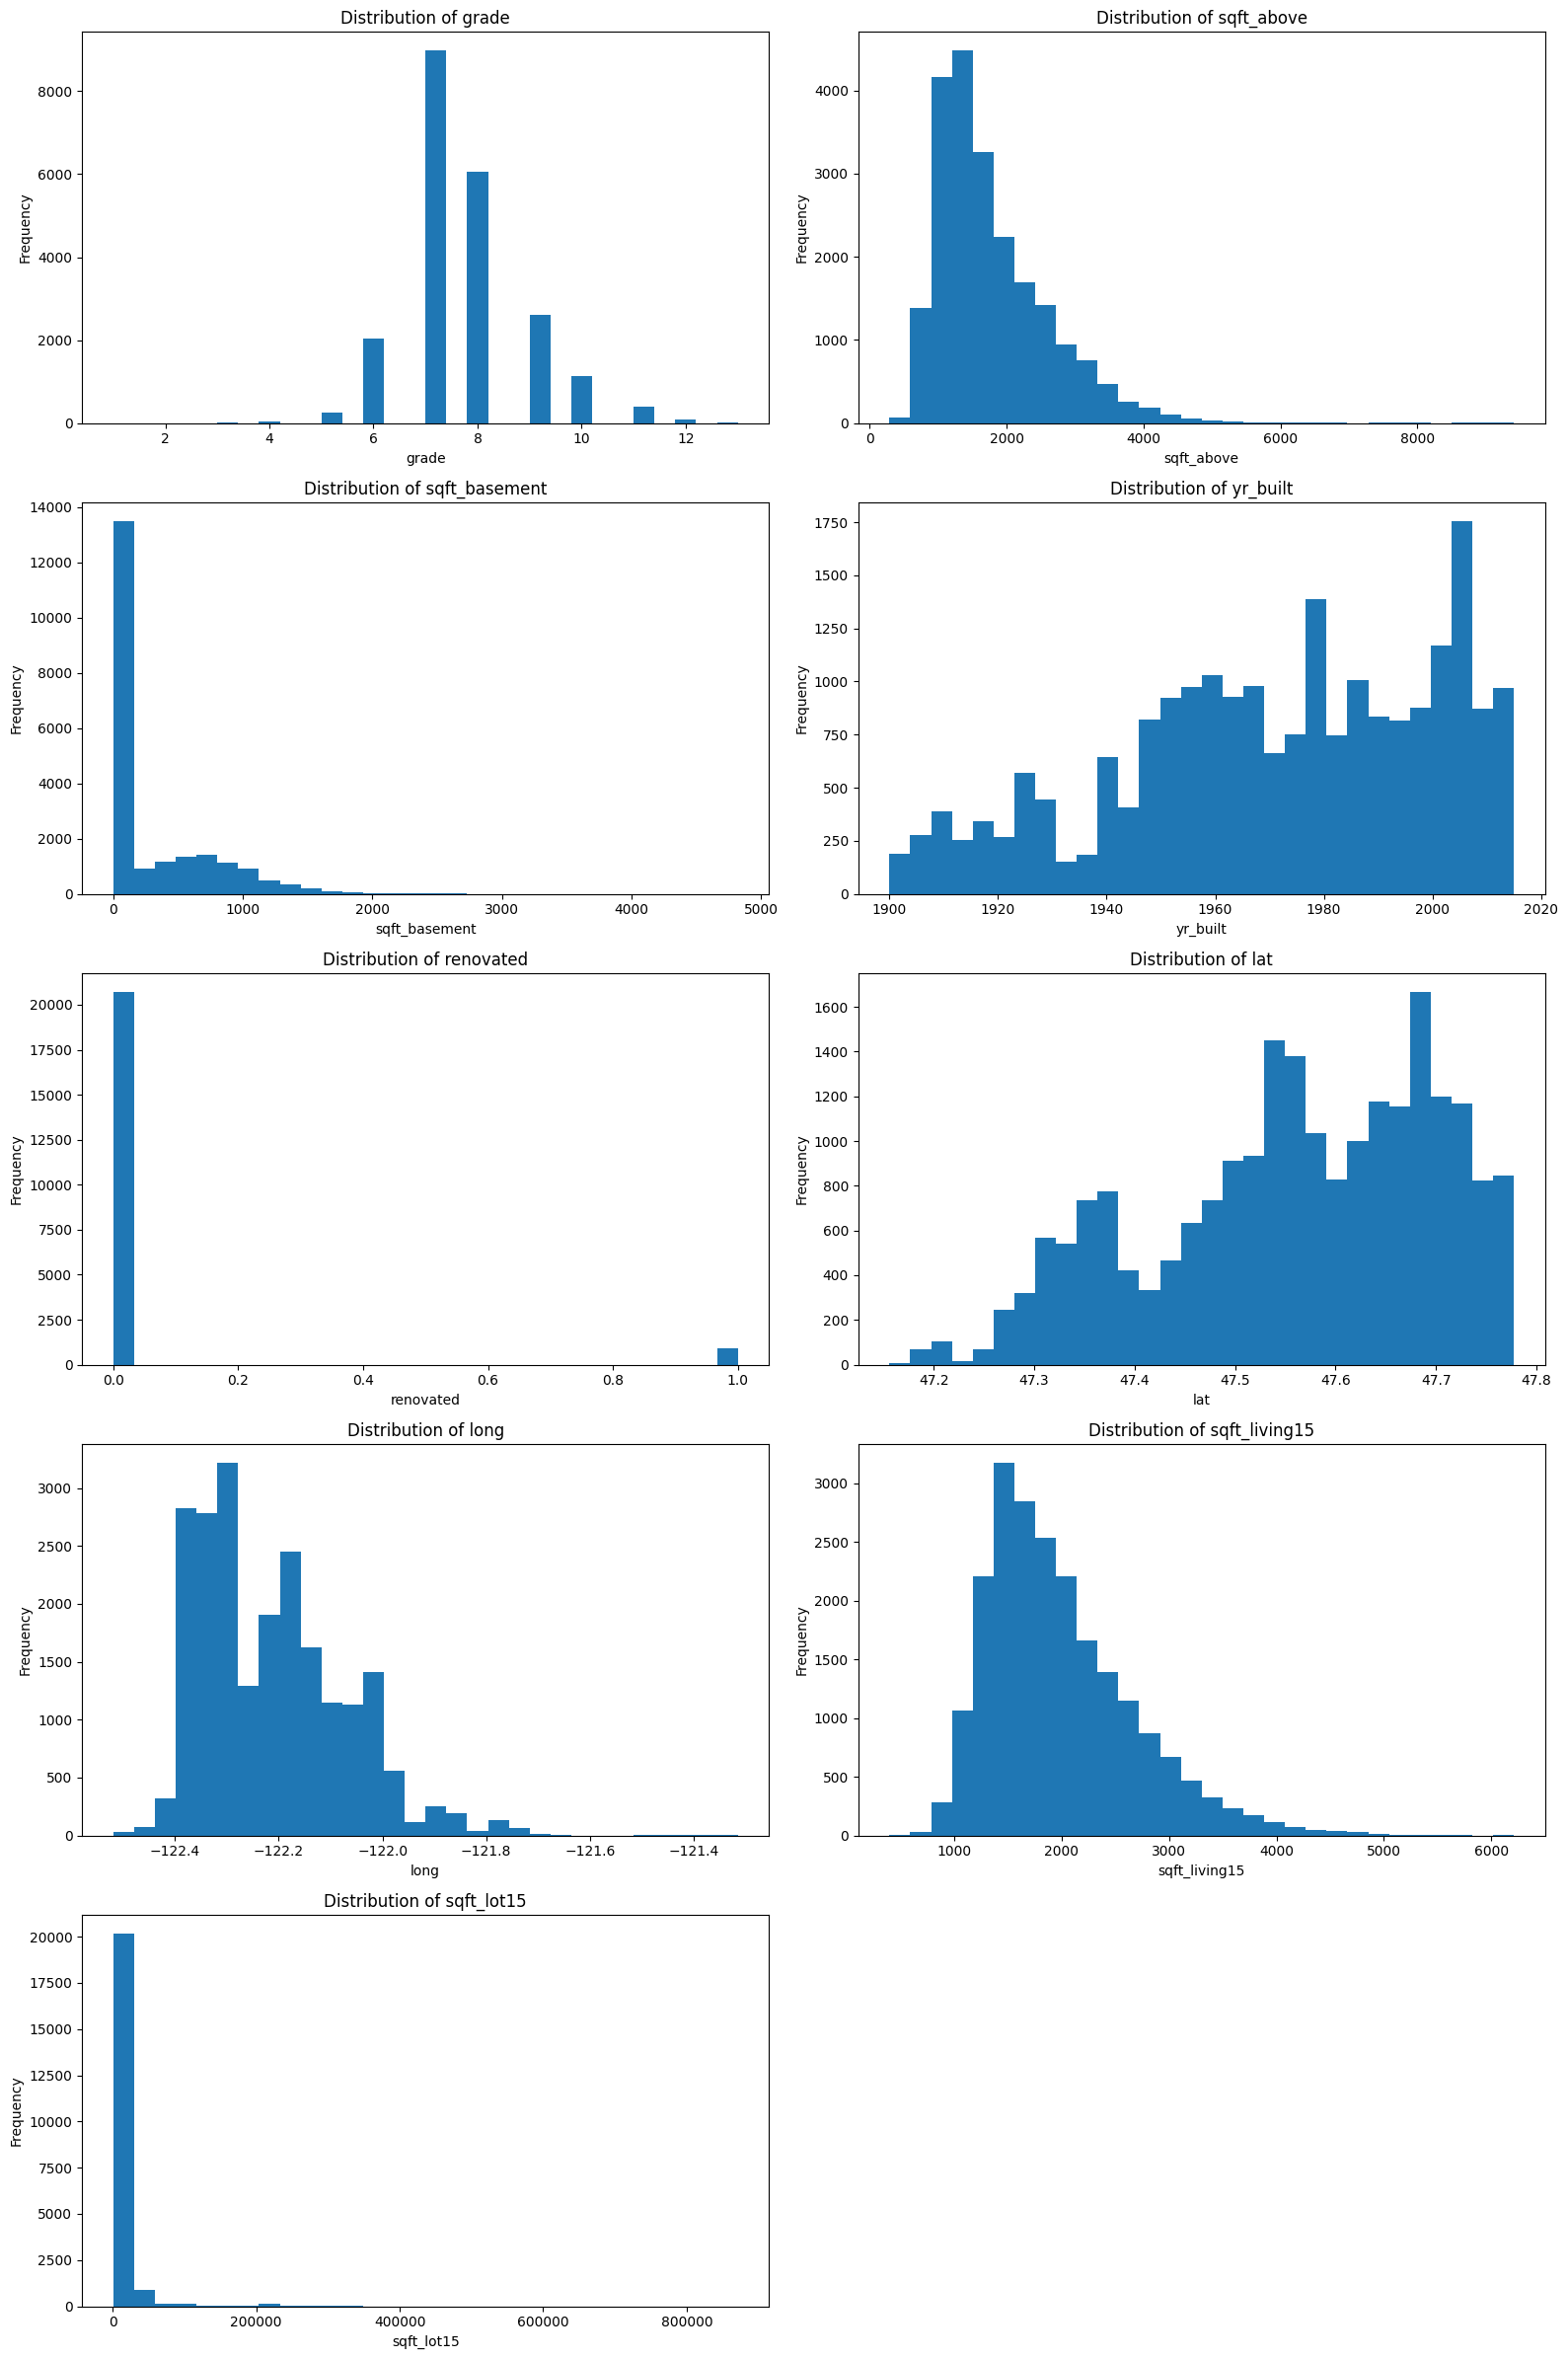

In [6]:
# Numeric columns to visualize (excluding 'id', 'zipcode')
numeric_columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                   'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement', 
                   'yr_built', 'renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

# Create histograms for the first 8 numeric columns
plt.figure(figsize=(16, 24))
for i, col in enumerate(numeric_columns[:8], 1):  # Plot the first 8 columns
    plt.subplot(4, 2, i)  # Create a 4x2 grid for subplots
    df[col].dropna().plot(kind='hist', bins=30, title=f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

# Create histograms for the remaining columns
plt.figure(figsize=(16, 24))
for i, col in enumerate(numeric_columns[8:], 1):  # Plot the remaining columns
    plt.subplot(5, 2, i)  # Create a 5x2 grid for subplots
    df[col].dropna().plot(kind='hist', bins=30, title=f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


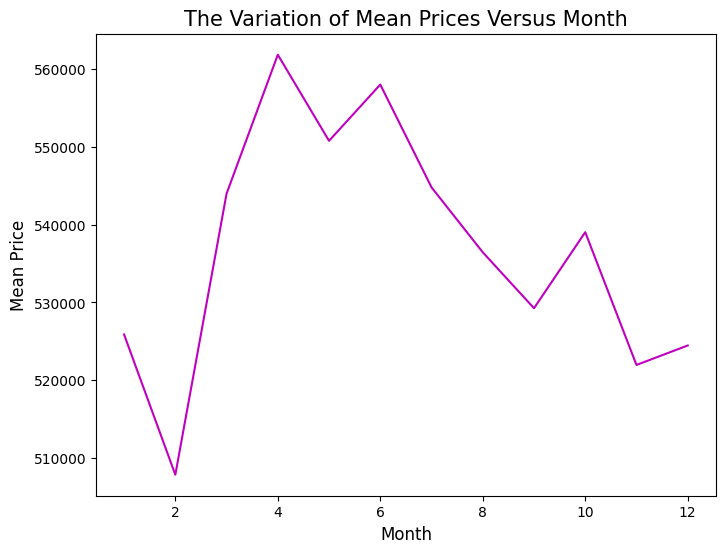

In [7]:
plt.figure(figsize=(8,6))
df.groupby('month').mean()['price'].plot(color='m')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Mean Price', fontsize=12)
plt.title('The Variation of Mean Prices Versus Month', fontsize=15)
plt.show()

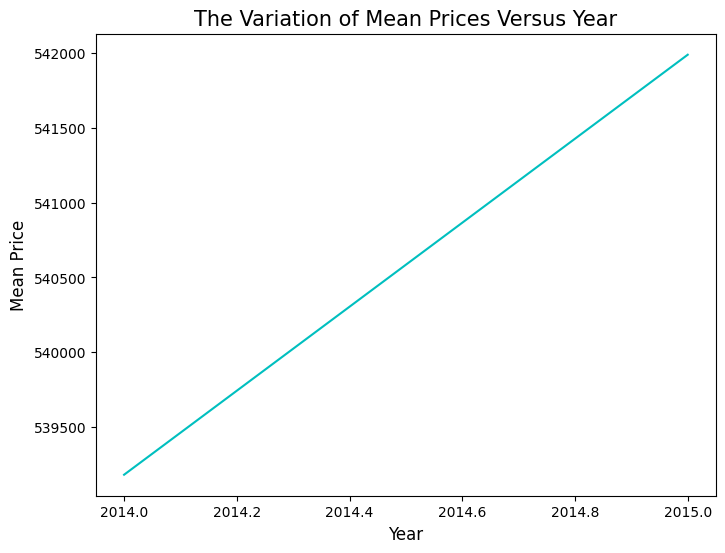

In [8]:
plt.figure(figsize=(8,6))
df.groupby('year').mean()['price'].plot(color='c')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Mean Price', fontsize=12)
plt.title('The Variation of Mean Prices Versus Year', fontsize=15)
plt.show()

## 1) Display the data types of each column using the function dtypes


In [9]:
df.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
year               int64
month              int64
renovated          int64
dtype: object

In [10]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,renovated
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,...,291.509045,1971.005136,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,2014.322954,6.574423,0.042289
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,...,442.575043,29.373411,53.505026,0.138564,0.140828,685.391304,27304.179631,0.467616,3.115308,0.201253
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,0.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,1.000000,0.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,0.000000,1951.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,2014.000000,4.000000,0.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,0.000000,1975.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,2014.000000,6.000000,0.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,...,560.000000,1997.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000,9.000000,0.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,4820.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,12.000000,1.000000


## 2) Drop the columns "id" and "Unnamed: 0" from axis 1 using the method drop(), then use the method describe() to obtain a statistical summary of the data



In [11]:
df.drop('id',axis=1,inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,98178,47.5112,-122.257,1340,5650,2014,10,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,98125,47.7210,-122.319,1690,7639,2014,12,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,98028,47.7379,-122.233,2720,8062,2015,2,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,98136,47.5208,-122.393,1360,5000,2014,12,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,98074,47.6168,-122.045,1800,7503,2015,2,0


In [12]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,renovated
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,...,291.509045,1971.005136,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,2014.322954,6.574423,0.042289
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,...,442.575043,29.373411,53.505026,0.138564,0.140828,685.391304,27304.179631,0.467616,3.115308,0.201253
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,1.000000,0.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,0.000000,1951.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,2014.000000,4.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,0.000000,1975.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,2014.000000,6.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,560.000000,1997.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000,9.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,4820.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,12.000000,1.000000


## 3) Use the method value_counts to count the number of houses with unique floor values, use the method .to_frame() to convert it to a dataframe.


In [13]:
df.floors.value_counts().to_frame()

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


## 4) Use the function boxplot in the seaborn library to determine whether house with a waterfront view or without a waterfront view have more price outliers.


C:\Users\admin\AppData\Local\Temp\ipykernel_10196\3222521478.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['waterfront'], y=df['price'], palette=["#1abc9c", "#f1c40f"])


Text(0.5, 1.0, "Boxplot of 'Waterfront' and 'Price")

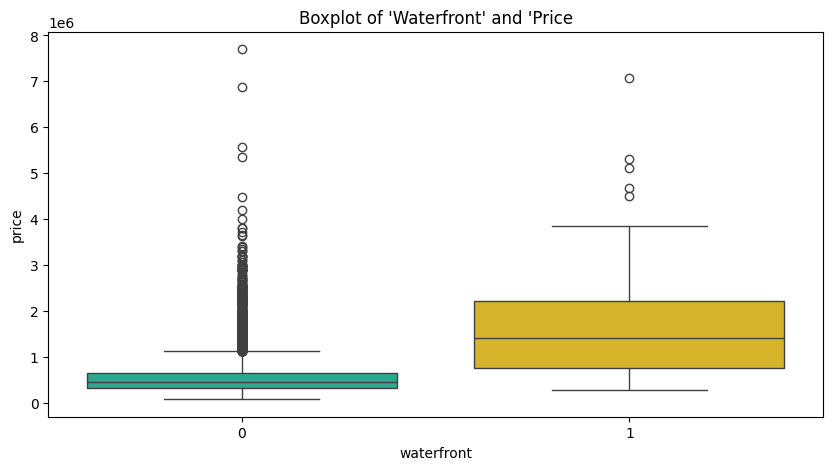

In [14]:
plt.figure(figsize=[10,5])
sns.boxplot(x=df['waterfront'], y=df['price'], palette=["#1abc9c", "#f1c40f"])
plt.title("Boxplot of 'Waterfront' and 'Price")

## 5) Use the function regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price.


Text(0.5, 1.0, 'Scatter Plot with Linear Regression: Square Footage and Price')

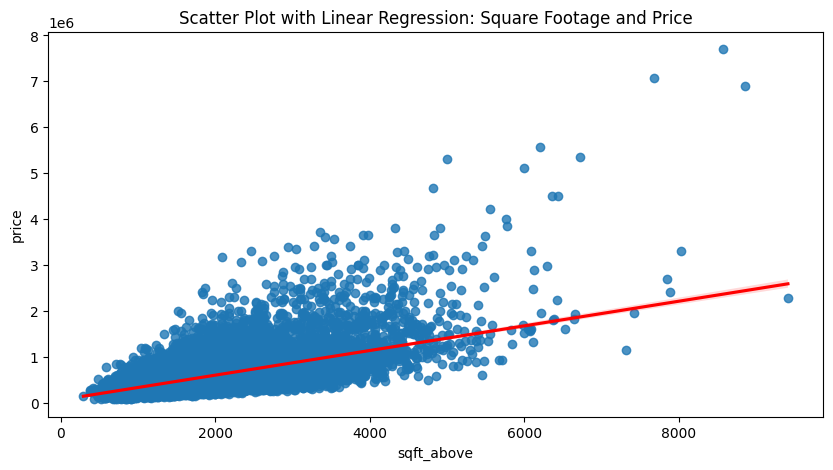

In [15]:
plt.figure(figsize=[10,5])
sns.regplot(x=df['sqft_above'], y=df['price'], line_kws={'color':'red'})
plt.title('Scatter Plot with Linear Regression: Square Footage and Price')


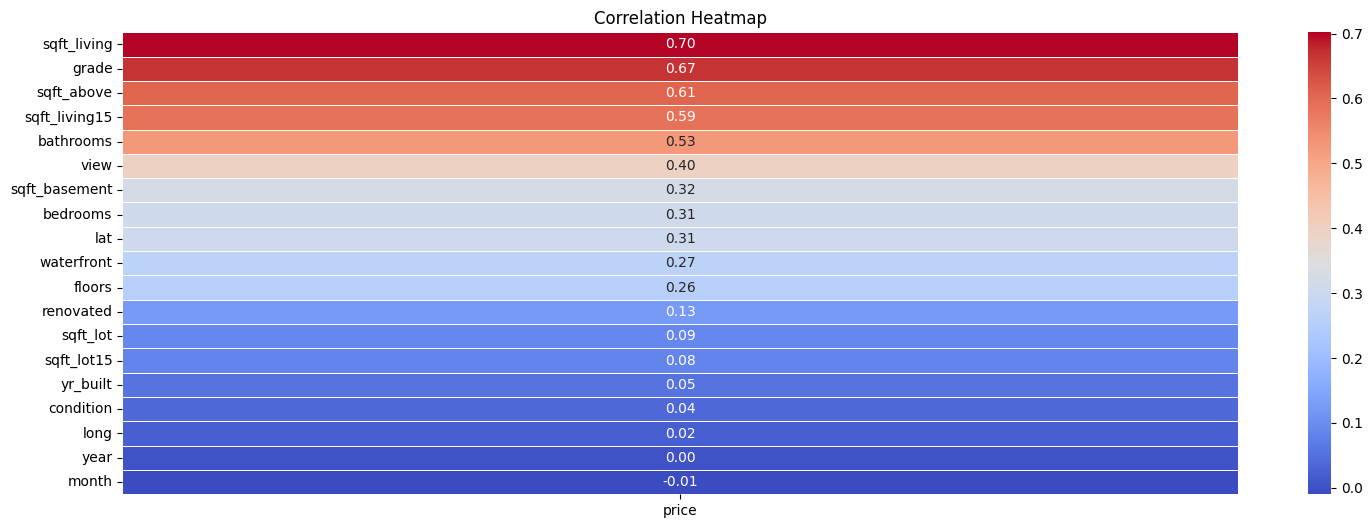

In [16]:
cor=df.corr()['price'].sort_values(ascending=False).drop(['price', 'zipcode'])

plt.figure(figsize=(18, 6))
sns.heatmap(cor.to_frame(), annot=True,  cmap='coolwarm', linewidths=0.5, fmt='.2f').set_title("Correlation Heatmap")
plt.show()

## 6) Fit a linear regression model to predict the 'price' using the feature 'sqft_living' then calculate the R^2.



In [17]:
X = np.array(df['sqft_living']).reshape(-1,1)
y = np.array(df.price)

In [18]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [19]:
r_sq = model.score(X, y)
print('Coefficient of determination(R^2):', r_sq)
print()
print('Intercept:', model.intercept_)
print()
print('Slope:', model.coef_)

Coefficient of determination(R^2): 0.4928532179037931

Intercept: -43580.743094473146

Slope: [280.6235679]


In [20]:
print("The predicted values are : " + str(model.predict(X)))

The predicted values are : [287555.06702452 677621.82640197 172499.40418656 ... 242655.29616092
 405416.96554144 242655.29616092]


## 7) Fit a linear regression model to predict the 'price' using the list of features: features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"] 
## - Then calculate the R^2.


In [21]:
# Define the list of features
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", 
            "view", "bathrooms", "sqft_living15", "sqft_above", "grade", 
            "sqft_living"]

# Prepare the feature matrix and target variable
X = df[features]  # Feature matrix
y = df['price']  # Target variable

In [22]:
model = LinearRegression().fit(X, y)

In [23]:
r_sq = model.score(X, y)
print('Coefficient of determination(R^2):', r_sq)
print()
print('Intercept:', model.intercept_)
print()
print('Slope:', model.coef_)

Coefficient of determination(R^2): 0.6577151058279324

Intercept: -32393033.99816355

Slope: [-2.93506755e+04  6.02163807e+05  6.73032296e+05 -2.58576191e+04
  6.44649631e+01  6.70524927e+04 -3.47249675e+03  4.31579036e+00
  6.49374282e+01  8.21667080e+04  1.29402390e+02]


In [24]:
y_pred = model.predict(X)
print('predicted response:', y_pred, sep='\n')

predicted response:
[283413.07663024 662377.84349019 305956.87442545 ... 304309.00758743
 428626.84540509 304107.09789875]


## 8)
### Create a list of tuples with estimators and model constructors:

#### The first element in the tuple contains the name of the estimator:

<code>'scale'</code>

<code>'polynomial'</code>

<code>'model'</code>

#### The second element in the tuple  contains the model constructor:

<code>StandardScaler()</code>

<code>PolynomialFeatures(include_bias=False)</code>

<code>LinearRegression()</code>

In [25]:
# Create a list of tuples containing the estimator name and its corresponding constructor
estimators = [('scale', StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model', LinearRegression())]

# Print the list of estimators
for name, estimator in estimators:
    print(f"Estimator: {name}, Constructor: {estimator}")

Estimator: scale, Constructor: StandardScaler()
Estimator: polynomial, Constructor: PolynomialFeatures(include_bias=False)
Estimator: model, Constructor: LinearRegression()


## 9) Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list features, and calculate the R^2.


In [26]:
# Create the pipeline with the list of estimators
pipe = Pipeline(steps=estimators)

# Fit the pipeline on the features and target variable
pipe.fit(df[features], y)

# Print predicted values and R^2 score
print("The predicted values are : " + str(pipe.predict(df[features])))
print("The R^2 score value is : " + str(pipe.score(df[features], y)))

The predicted values are : [351286. 563382. 449124. ... 420596. 461702. 420468.]
The R^2 score value is : 0.7507668109758638


## 10) Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data.



In [27]:
# Split the data into training and testing sets with random_state=1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print("number of test samples:", X_test.shape[0])
print("number of training samples:",X_train.shape[0])

number of test samples: 4323
number of training samples: 17290


In [28]:
# Create and train the Ridge regression model
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

print("The predicted values are : " + str(ridge.predict(X_test)))
print("The R^2 Score value is mentioned as : " + str(ridge.score(X_test, y_test)))

The predicted values are : [ 652043.20808709  512608.94605702  809367.35638661 ...  316630.15105988
 1320208.13016248  472606.2142918 ]
The R^2 Score value is mentioned as : 0.6460194468601677


## 11) Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided.


In [29]:
poly = PolynomialFeatures(degree = 2)
x_train_poly = poly.fit_transform(X_train[features])
x_test_poly = poly.transform(X_test[features])

RidgeModel = Ridge(alpha = 0.1)
RidgeModel.fit(x_train_poly, y_train)
yhat = RidgeModel.predict(x_test_poly)

print("The R^2 Score value for the testing data is : " + str(RidgeModel.score(x_test_poly, y_test)))

The R^2 Score value for the testing data is : 0.7546208831630062


APP

In [30]:
import pickle

# Chọn các thuộc tính cần thiết
features = ["floors", "waterfront", "bedrooms", "view", "bathrooms", "sqft_above", "grade", "sqft_living"]
q = df[features]
h = df['price']

# Chia dữ liệu thành training và testing
X_train1, X_test, y_train1, y_test = train_test_split(q, h, test_size=0.2, random_state=1)

# Huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train1, y_train1)

# Lưu mô hình đã huấn luyện vào file
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [31]:
# Tính giá trị trung bình của cột giá
average_price = df['price'].mean()

# Lưu giá trị trung bình vào một file hoặc cấu hình để sử dụng trong Flask app
with open('average_price.pkl', 'wb') as f:
    pickle.dump(average_price, f)